In [255]:
# Imports a utilizar 
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

## Abrir la data y observar su tipo de variable

In [256]:
# Crea una lista vacía para guardar los DataFrames
dfs = []

for year in range(2009, 2019):
    filename = f"data{year}.sav"
    df = pd.read_spss(filename)
    dfs.append(df)
    df['Year'] = year

# Concatena los DataFrames en uno solo
merged_df = pd.concat(dfs)

In [257]:
merged_df.columns

Index(['Depreg', 'mupreg', 'Mesreg', 'Añoreg', 'Depocu', 'Mupocu', 'Areag',
       'Libras', 'Onzas', 'Diaocu', 'Mesocu', 'Añoocu', 'Sexo', 'Tipar',
       'Edadp', 'Deprep', 'muprep', 'Gretnp', 'Escivp', 'Depnap', 'Mupnap',
       'Naciop', 'Ocupap', 'Edadm', 'Deprem', 'Muprem', 'Gretnm', 'Escivm',
       'Depnam', 'Mupnam', 'Naciom', 'Ocupam', 'Asisrec', 'Sitioocu', 'Tohite',
       'Tohinm', 'Tohivi', 'Year', 'mupnap', 'Escolap', 'muprem', 'grupetma',
       'mupnam', 'Escolam', 'Mupreg', 'Muprep', 'Paisrep', 'Paisnacp',
       'Paisrem', 'Paisnacm', 'munnam', 'PuebloPP', 'Ciuopad', 'PuebloPM',
       'Ciuomad', 'Munpnap', 'ciuomad', 'TipoIns', 'ViaPar'],
      dtype='object')

In [258]:
merged_df.dtypes

Depreg      category
mupreg      category
Mesreg      category
Añoreg       float64
Depocu      category
Mupocu        object
Areag       category
Libras        object
Onzas         object
Diaocu       float64
Mesocu      category
Añoocu       float64
Sexo        category
Tipar         object
Edadp         object
Deprep      category
muprep        object
Gretnp      category
Escivp      category
Depnap        object
Mupnap        object
Naciop        object
Ocupap        object
Edadm         object
Deprem      category
Muprem        object
Gretnm      category
Escivm      category
Depnam        object
Mupnam        object
Naciom        object
Ocupam        object
Asisrec       object
Sitioocu      object
Tohite        object
Tohinm        object
Tohivi        object
Year           int64
mupnap      category
Escolap       object
muprem      category
grupetma    category
mupnam      category
Escolam       object
Mupreg        object
Muprep        object
Paisrep       object
Paisnacp     

In [259]:
columns = merged_df.columns
numeric_data = merged_df._get_numeric_data().columns

categorical_data = set(columns) - set(numeric_data)
print("-> Columnas con valores numericos \n ",numeric_data ,'\n')
print("-> Columnas con valores categoricos\n ",categorical_data)

-> Columnas con valores numericos 
  Index(['Añoreg', 'Diaocu', 'Añoocu', 'Year'], dtype='object') 

-> Columnas con valores categoricos
  {'Naciom', 'Ciuopad', 'Paisnacm', 'Escolam', 'Paisnacp', 'Asisrec', 'Depnam', 'mupreg', 'ViaPar', 'Tohivi', 'Areag', 'Depreg', 'Escivm', 'grupetma', 'Edadp', 'Onzas', 'Mupocu', 'Sitioocu', 'PuebloPP', 'Munpnap', 'Mupreg', 'ciuomad', 'Escivp', 'mupnam', 'munnam', 'mupnap', 'Deprem', 'Ocupam', 'Muprem', 'Paisrep', 'muprem', 'Naciop', 'Edadm', 'Tohite', 'Deprep', 'Tipar', 'Tohinm', 'Libras', 'Mesocu', 'Gretnm', 'Ciuomad', 'Sexo', 'Escolap', 'Ocupap', 'Mesreg', 'muprep', 'PuebloPM', 'Muprep', 'Depocu', 'Mupnap', 'Mupnam', 'Depnap', 'TipoIns', 'Gretnp', 'Paisrem'}


## Limpieza de Variables

Se toman las columnas que van a ser utilizadas en el modelo predictivo. Estas son:
- Departamento de registro
- Municipio de registro
- Escolaridad de la madre
- Escolaridad del padre
- Año de registro

In [260]:
columnas_deseadas = ['Depreg', 'Escolam', 'Escolap', 'Year', 'Asisrec', 'Sitioocu']
data = merged_df.drop(columns=merged_df.columns.difference(columnas_deseadas))

Vamos a verificar si la data que estamos tomando contiene valores nulos o NaN.

Podemos observar que en nuestro dataset a utilizar contamos con algunos registros faltantes. Estos estan ubicados especificamente en las columnas de escolaridad de la madre y del padre del nacido.

In [261]:
data.columns

Index(['Depreg', 'Asisrec', 'Sitioocu', 'Year', 'Escolap', 'Escolam'], dtype='object')

In [262]:
data

,Depreg,Asisrec,Sitioocu,Year,Escolap,Escolam
0,Guatemala,Medica,Domicilio,2009,NaN,NaN
1,Guatemala,Medica,Domicilio,2009,NaN,NaN
2,Guatemala,Medica,Domicilio,2009,NaN,NaN
3,Guatemala,Medica,Domicilio,2009,NaN,NaN
4,Guatemala,Medica,Domicilio,2009,NaN,NaN
...,...,...,...,...,...,...
383258,Quiche,Medico,Vía Pública,2018,Básica,Diversificado
383259,Escuintla,Empirico,Vía Pública,2018,Diversificado,Diversificado
383260,Alta Verapaz,Empirico,Vía Pública,2018,Primaria,Ninguno
383261,Peten,Empirico,Vía Pública,2018,Ninguno,Diversificado


In [263]:
data.shape

(3796110, 6)

## Análisis Exploratorio

Podemos observar que en nuestro data set contamos con una unica variable numerica siendo el año del registro. Luego en cuanto a la escolaridad de ambos padres y el municipio y departamento de registro lo encontramos como categorico.

In [264]:
data['Escolam'] = data['Escolam'].fillna('Ninguno')
data['Escolap'] = data['Escolap'].fillna('Ninguno')

In [265]:
data['Escolam'] = data['Escolam'].replace(['Básico'], 'Básica')
data['Escolam'] = data['Escolam'].replace(['Post grado', 'Post Grado'], 'Postgrado')
data['Escolap'] = data['Escolam'].replace(['Básico'], 'Básica')
data['Escolap'] = data['Escolam'].replace(['Post grado', 'Post Grado'], 'Postgrado')


In [266]:
data['Escolam'].unique()

array(['Ninguno', 'Diversificado', 'Universitario', 'Básica', 'Ignorado',
       'Primaria', 'Postgrado', 'Doctorado'], dtype=object)

In [267]:
data['Escolap'].unique()


array(['Ninguno', 'Diversificado', 'Universitario', 'Básica', 'Ignorado',
       'Primaria', 'Postgrado', 'Doctorado'], dtype=object)

In [268]:
data['Sitioocu'] = data['Sitioocu'].replace(['Hospital'], 'Hospital público')
data['Sitioocu'] = data['Sitioocu'].replace(['Casa de salud'], 'Centro de salud')
data['Sitioocu'] = data['Sitioocu'].replace(['Via publica','Vìa pública'], 'Vía Pública')

In [269]:
data['Asisrec'] = data['Asisrec'].replace(['Medica', 'Medico'], 'Médica')
data['Asisrec'] = data['Asisrec'].replace(['Medica', 'Medico'], 'Médica')
data['Asisrec'] = data['Asisrec'].replace(['Paramedico'], 'Paramédica')
data['Asisrec'] = data['Asisrec'].replace(['Empirico', 'Empirica'], 'Empírica')
data['Asisrec'] = data['Asisrec'].replace(['Ninguno'], 'Ninguna')

In [270]:
data['Asisrec'].unique()

array(['Médica', 'Ninguna', 'Comadrona', 'Ignorado', 'Empírica',
       'Paramédica'], dtype=object)

In [271]:
data['Sitioocu'].unique()

array(['Domicilio', 'Vía Pública', 'Centro de salud', 'Hospital público',
       'Ignorado', 'Hospital privado', 'Seguro social', 'Otro'],
      dtype=object)

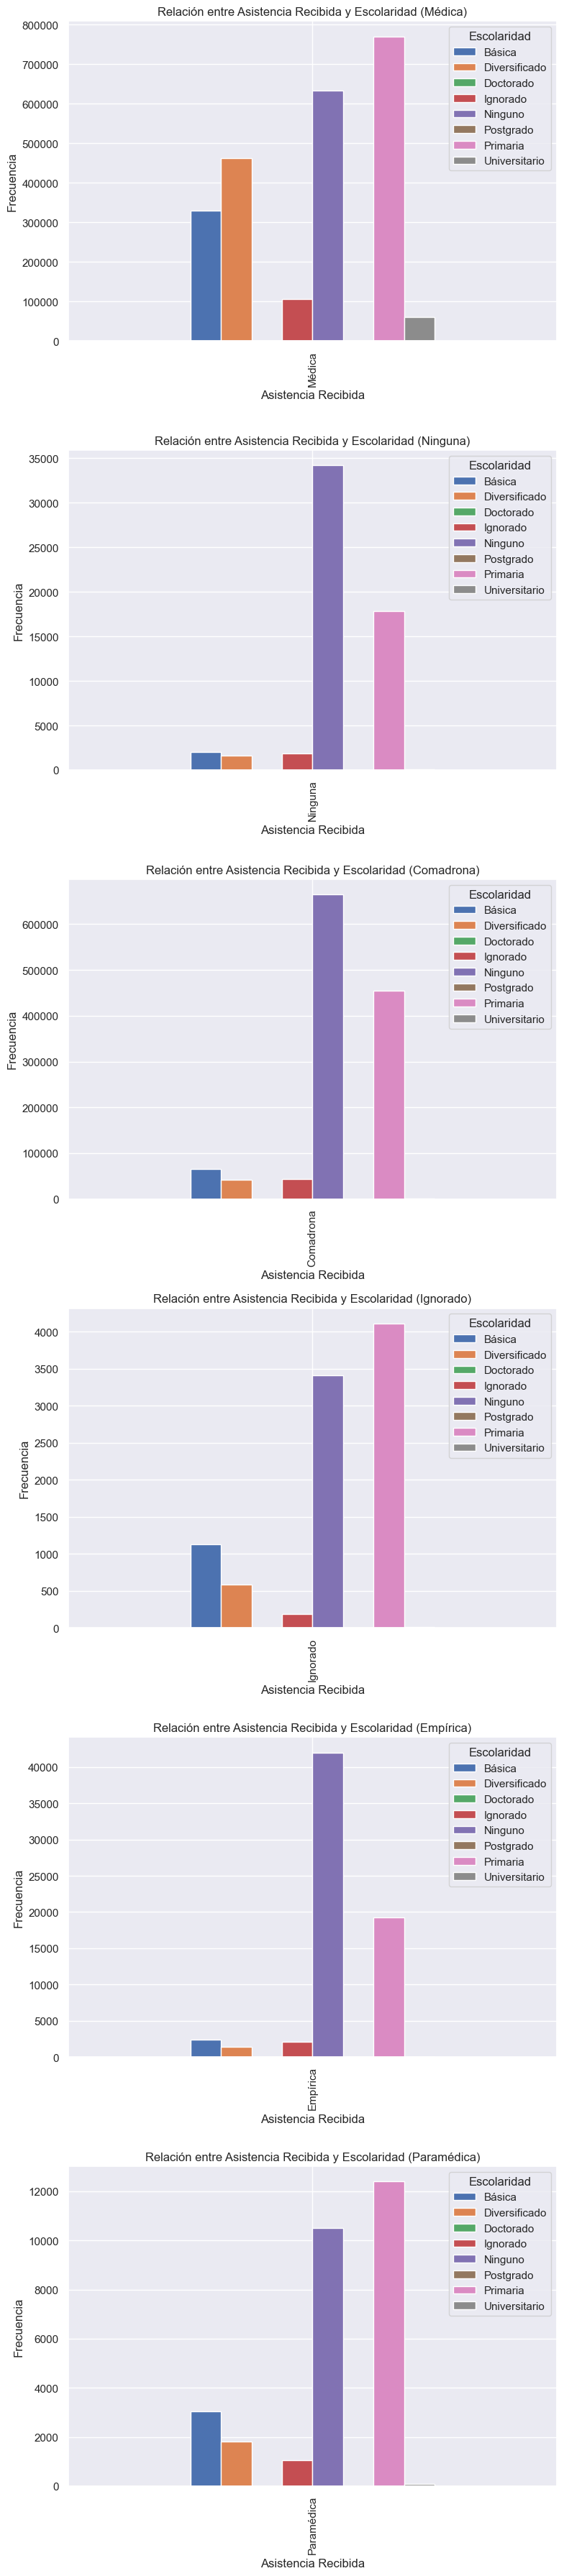

In [272]:
# Calcular la tabla de contingencia
tabla_contingencia = pd.crosstab(data['Asisrec'], data['Escolam'])

# Obtener los diferentes valores de 'Asisrec'
valores_asisrec = data['Asisrec'].unique()

# Crear una figura y subparcelas para cada tipo de asistencia
fig, axs = plt.subplots(len(valores_asisrec), 1, figsize=(8, 6 * len(valores_asisrec)))

# Iterar sobre los valores de 'Asisrec' y crear un gráfico para cada uno
for i, valor in enumerate(valores_asisrec):
    # Obtener los datos correspondientes al valor de 'Asisrec'
    datos = tabla_contingencia.loc[[valor]]
    
    # Crear el gráfico de barras en la subparcela correspondiente
    ax = axs[i]
    datos.plot(kind='bar', ax=ax)
    ax.set_xlabel('Asistencia Recibida')
    ax.set_ylabel('Frecuencia')
    ax.set_title('Relación entre Asistencia Recibida y Escolaridad (' + valor + ')')
    ax.legend(title='Escolaridad')

# Ajustar el espaciado entre subparcelas
plt.tight_layout()

# Mostrar los gráficos
plt.show()


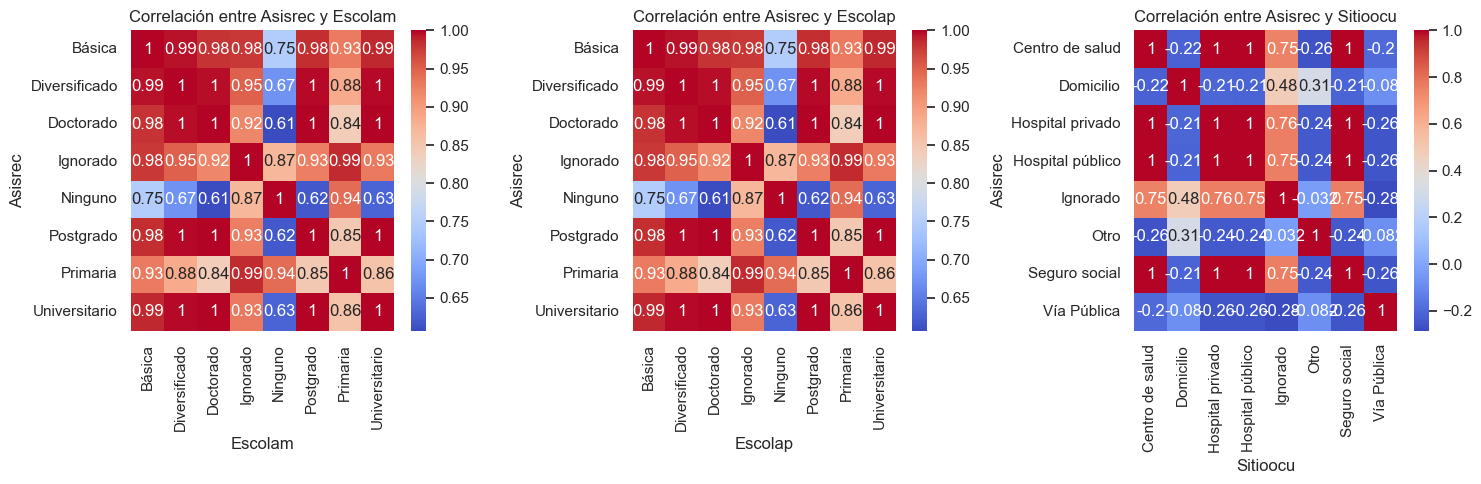

In [273]:
# Calcular la tabla de contingencia
tabla_contingencia_escolam = pd.crosstab(data['Asisrec'], data['Escolam'])
tabla_contingencia_escolap = pd.crosstab(data['Asisrec'], data['Escolap'])
tabla_contingencia_sitioocu = pd.crosstab(data['Asisrec'], data['Sitioocu'])

# Calcular la correlación utilizando el coeficiente de Pearson
correlacion1 = tabla_contingencia_escolam.corr()
correlacion2 = tabla_contingencia_escolap.corr()
correlacion3 = tabla_contingencia_sitioocu.corr()

# Crear un grid para los gráficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Gráfico de correlación para Escolam
sns.heatmap(correlacion1, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlación entre Asisrec y Escolam')
axes[0].set_xlabel('Escolam')
axes[0].set_ylabel('Asisrec')

# Gráfico de correlación para Escolap
sns.heatmap(correlacion2, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlación entre Asisrec y Escolap')
axes[1].set_xlabel('Escolap')
axes[1].set_ylabel('Asisrec')

# Gráfico de correlación para Sitioocu
sns.heatmap(correlacion3, annot=True, cmap='coolwarm', ax=axes[2])
axes[2].set_title('Correlación entre Asisrec y Sitioocu')
axes[2].set_xlabel('Sitioocu')
axes[2].set_ylabel('Asisrec')

# Ajustar espaciado entre los gráficos
plt.tight_layout()

# Mostrar los gráficos en el grid
plt.show()


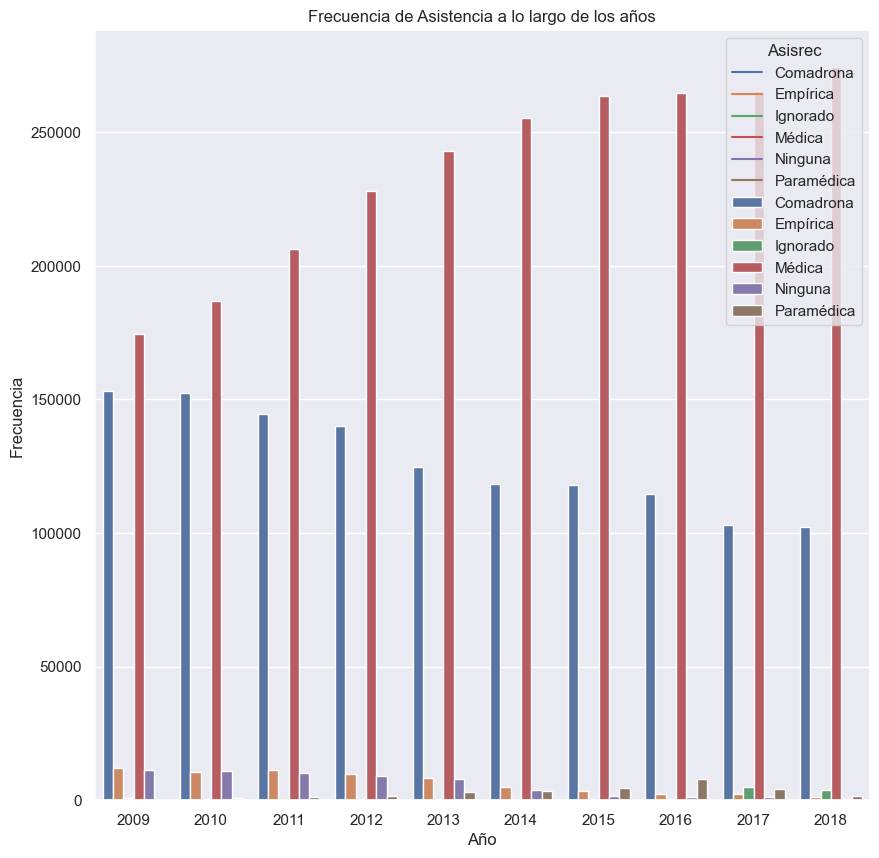

In [274]:
# Agrupar los datos por 'Year' y 'Asisrec' y contar la frecuencia de cada combinación
grouped_data = data.groupby(['Year', 'Asisrec']).size().reset_index(name='Count')

# Ordenar los datos por 'Year'
grouped_data = grouped_data.sort_values(by='Year')

# Graficar los resultados utilizando un gráfico de línea o de barras
plt.figure(figsize=(10, 10))
sns.lineplot(x='Year', y='Count', hue='Asisrec', data=grouped_data)
# O bien, utilizar un gráfico de barras agrupado
sns.barplot(x='Year', y='Count', hue='Asisrec', data=grouped_data, ci=None)
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Asistencia a lo largo de los años')
plt.show()

In [275]:
recuento_asistencia = data['Asisrec'].value_counts()
recuento_asistencia

Médica        2362490
Comadrona     1270566
Empírica        67164
Ninguna         57573
Paramédica      28886
Ignorado         9431
Name: Asisrec, dtype: int64

Ahora vamos a codificar la escolaridad de la madre y del padre asignandoles un valor numerico a dichas variables. Para ello vamos a usar el diccionario de variables directamente brindado por el Instituto Nacional de Estadistica donde asignan: <br>
Escolaridad
- 1: Ninguno
- 2: Primaria
- 3: Básica
- 4: Diversificado
- 5: Universitario
- 6: Postgrado
- 7: Ignorado
- 8: Doctorado

Departamentos
1. Guatemala
2. El Progreso
3. Sacatepéquez
4. Chimaltenango
5. Escuintla
6. Santa Rosa
7. Sololá
8. Totonicapán
9. Quetzaltenango
10. Suchitepéquez
11. Retalhuleu
12. San Marcos
13. Huehuetenango
14. Quiché
15. Baja Verapaz
16. Alta Verapaz
17. Petén
18. Izabal
19. Zacapa
20. Chiquimula
21. Jalapa
22. Jutiapa

Asistencia
- 'Medico':1
- 'Personal de Enfermeria':2
- 'Paramedico':3
- 'Comadrona':4
- 'Empirico':5
- 'Ninguno':6
- 'Ignorado':7

Sitio ocurrencia
- 'Hospital público':1
- 'Hospital privado':2
- 'Centro de salud':3
- 'Seguro social':4
- 'Vìa pública':5
- 'Domicilio':6
- 'Otro':7
- 'Ignorado':8

In [276]:
data['Escolam'] = data['Escolam'].replace({
    'Ninguno': 1,
    'Primaria': 2,
    'Básica': 3,
    'Diversificado': 4,
    'Universitario': 5,
    'Postgrado': 6,
    'Ignorado': 7,
    'Doctorado': 8
})
data['Escolap'] = data['Escolap'].replace({
    'Ninguno': 1,
    'Primaria': 2,
    'Básica': 3,
    'Diversificado': 4,
    'Universitario': 5,
    'Postgrado': 6,
    'Ignorado': 7,
    'Doctorado': 8
})

data['Depreg'] = data['Depreg'].replace({
    'Guatemala': 1,
    'El Progreso': 2,
    'Sacatepéquez': 3,
    'Chimaltenango': 4,
    'Escuintla': 5,
    'Santa Rosa': 6,
    'Sololá': 7,
    'Solola': 7,
    'Totonicapán': 8,
    'Quetzaltenango': 9,
    'Suchitepéquez': 10,
    'Retalhuleu': 11,
    'San Marcos': 12,
    'Huehuetenango': 13,
    'Quiché': 14,
    'Baja Verapaz': 15,
    'Alta Verapaz': 16,
    'Petén': 17,
    'Izabal': 18,
    'Zacapa': 19,
    'Chiquimula': 20,
    'Jalapa': 21,
    'Jutiapa': 22,
    'Guatemala': 1,
    'El Progreso': 2,
    'Sacatepequez': 3,
    'Chimaltenango': 4,
    'Escuintla': 5,
    'Santa Rosa': 6,
    'Solola': 7,
    'Totonicapan': 8,
    'Quetzaltenango': 9,
    'Suchitepecquez': 10,
    'Retalhuleu': 11,
    'San Marcos': 12,
    'Huehuetenango': 13,
    'Quiche': 14,
    'Baja Verapaz': 15,
    'Alta Verapaz': 16,
    'Peten': 17,
    'Izabal': 18,
    'Zacapa': 19,
    'Chiquimula': 20,
    'Jalapa': 21,
    'Jutiapa': 22,
    'Suchitepequez':10
})

data['Asisrec'] = data['Asisrec'].replace({
'Medico':1,
'Medica':1,
'Médica':1,
'Personal de Enfermeria':2,
'Paramedico':3,
'Paramédica':3,
'Comadrona':4,
'Empirico':5,
'Empirica':5,
'Empírica':5,
'Ninguno':6,
'Ninguna':6,
'Ignorado':7
})

data['Sitioocu'] = data['Sitioocu'].replace({
'Hospital público':1,
'Hospital':1,
'Hospital privado':2,
'Centro de salud':3,
'Casa de salud':3,
'Seguro social':4,
'Vìa pública':5,
'Via pública':5,
'Via publica':5,
'Vía Pública':5,
'Domicilio':6,
'Otro':7,
'Ignorado':8

})

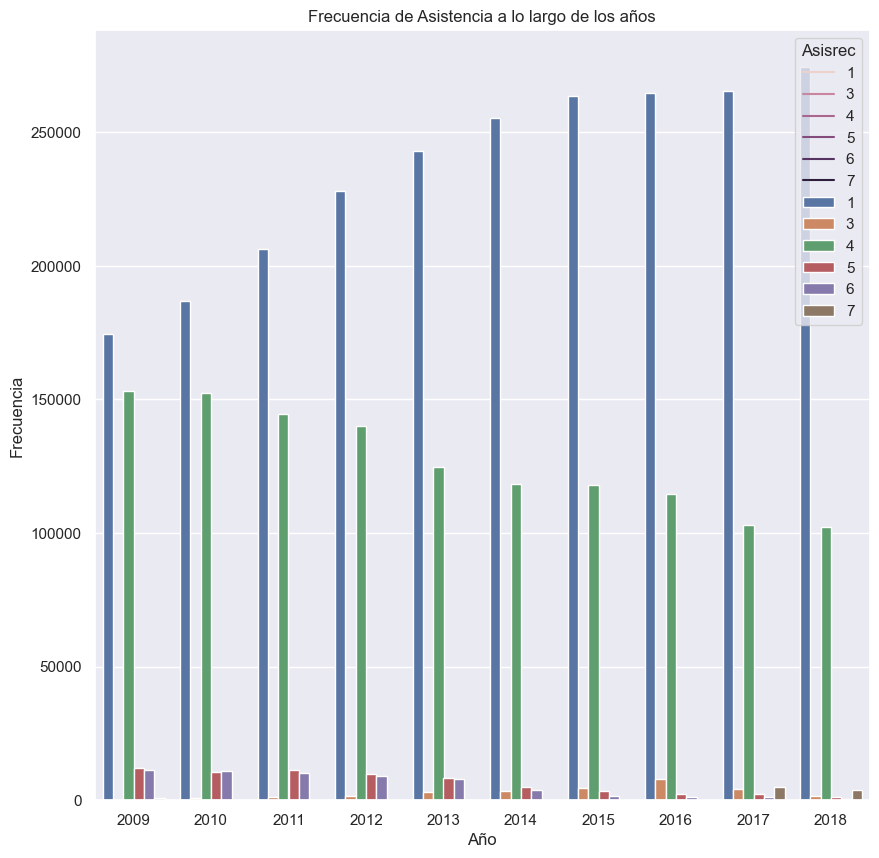

In [277]:
# Agrupar los datos por 'Year' y 'Asisrec' y contar la frecuencia de cada combinación
grouped_data = data.groupby(['Year', 'Asisrec']).size().reset_index(name='Count')

# Ordenar los datos por 'Year'
grouped_data = grouped_data.sort_values(by='Year')

# Graficar los resultados utilizando un gráfico de línea o de barras
plt.figure(figsize=(10, 10))
sns.lineplot(x='Year', y='Count', hue='Asisrec', data=grouped_data)
# O bien, utilizar un gráfico de barras agrupado
sns.barplot(x='Year', y='Count', hue='Asisrec', data=grouped_data, ci=None)
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Asistencia a lo largo de los años')
plt.show()

In [278]:
print(list(data['Escolam'].unique()))
print(list(data['Escolap'].unique()))
print(list(data['Asisrec'].unique()))
print(list(data['Sitioocu'].unique()))

[1, 4, 5, 3, 7, 2, 6, 8]
[1, 4, 5, 3, 7, 2, 6, 8]
[1, 6, 4, 7, 5, 3]
[6, 5, 3, 1, 8, 2, 4, 7]


In [279]:
data_sitio = data.copy()
data = data[data['Asisrec'] != 1]
data = data[data['Asisrec'] != 4]
data = data[data['Asisrec'] != 7]

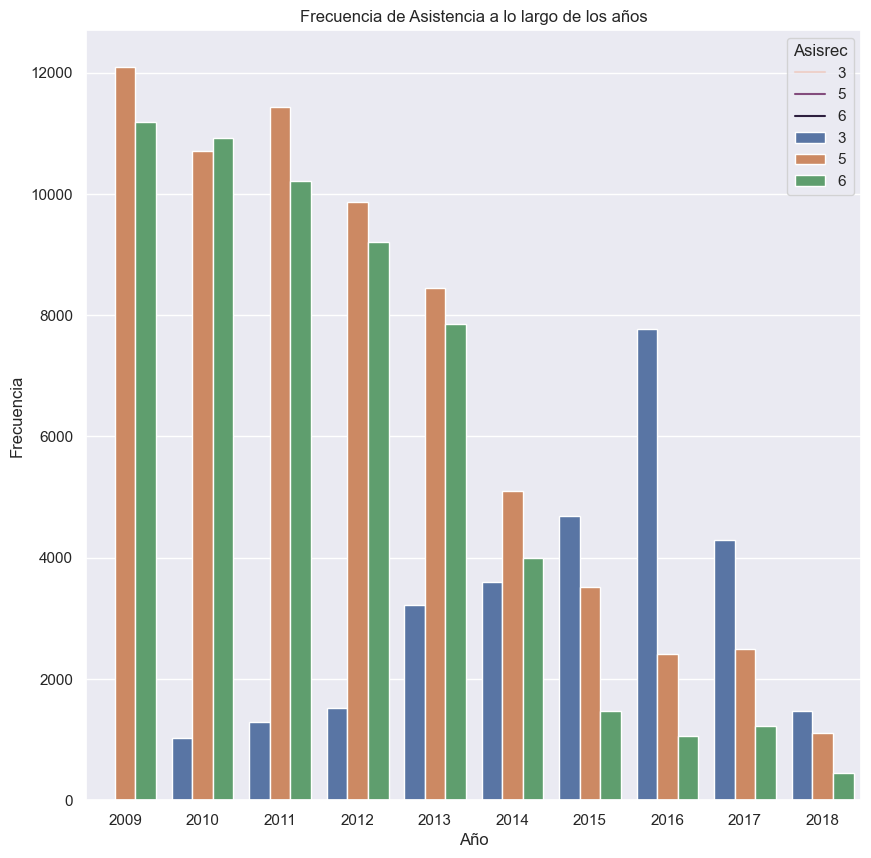

In [280]:
# Agrupar los datos por 'Year' y 'Asisrec' y contar la frecuencia de cada combinación
grouped_data = data.groupby(['Year', 'Asisrec']).size().reset_index(name='Count')

# Ordenar los datos por 'Year'
grouped_data = grouped_data.sort_values(by='Year')

# Graficar los resultados utilizando un gráfico de línea o de barras
plt.figure(figsize=(10, 10))
sns.lineplot(x='Year', y='Count', hue='Asisrec', data=grouped_data)
# O bien, utilizar un gráfico de barras agrupado
sns.barplot(x='Year', y='Count', hue='Asisrec', data=grouped_data, ci=None)
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Asistencia a lo largo de los años')
plt.show()

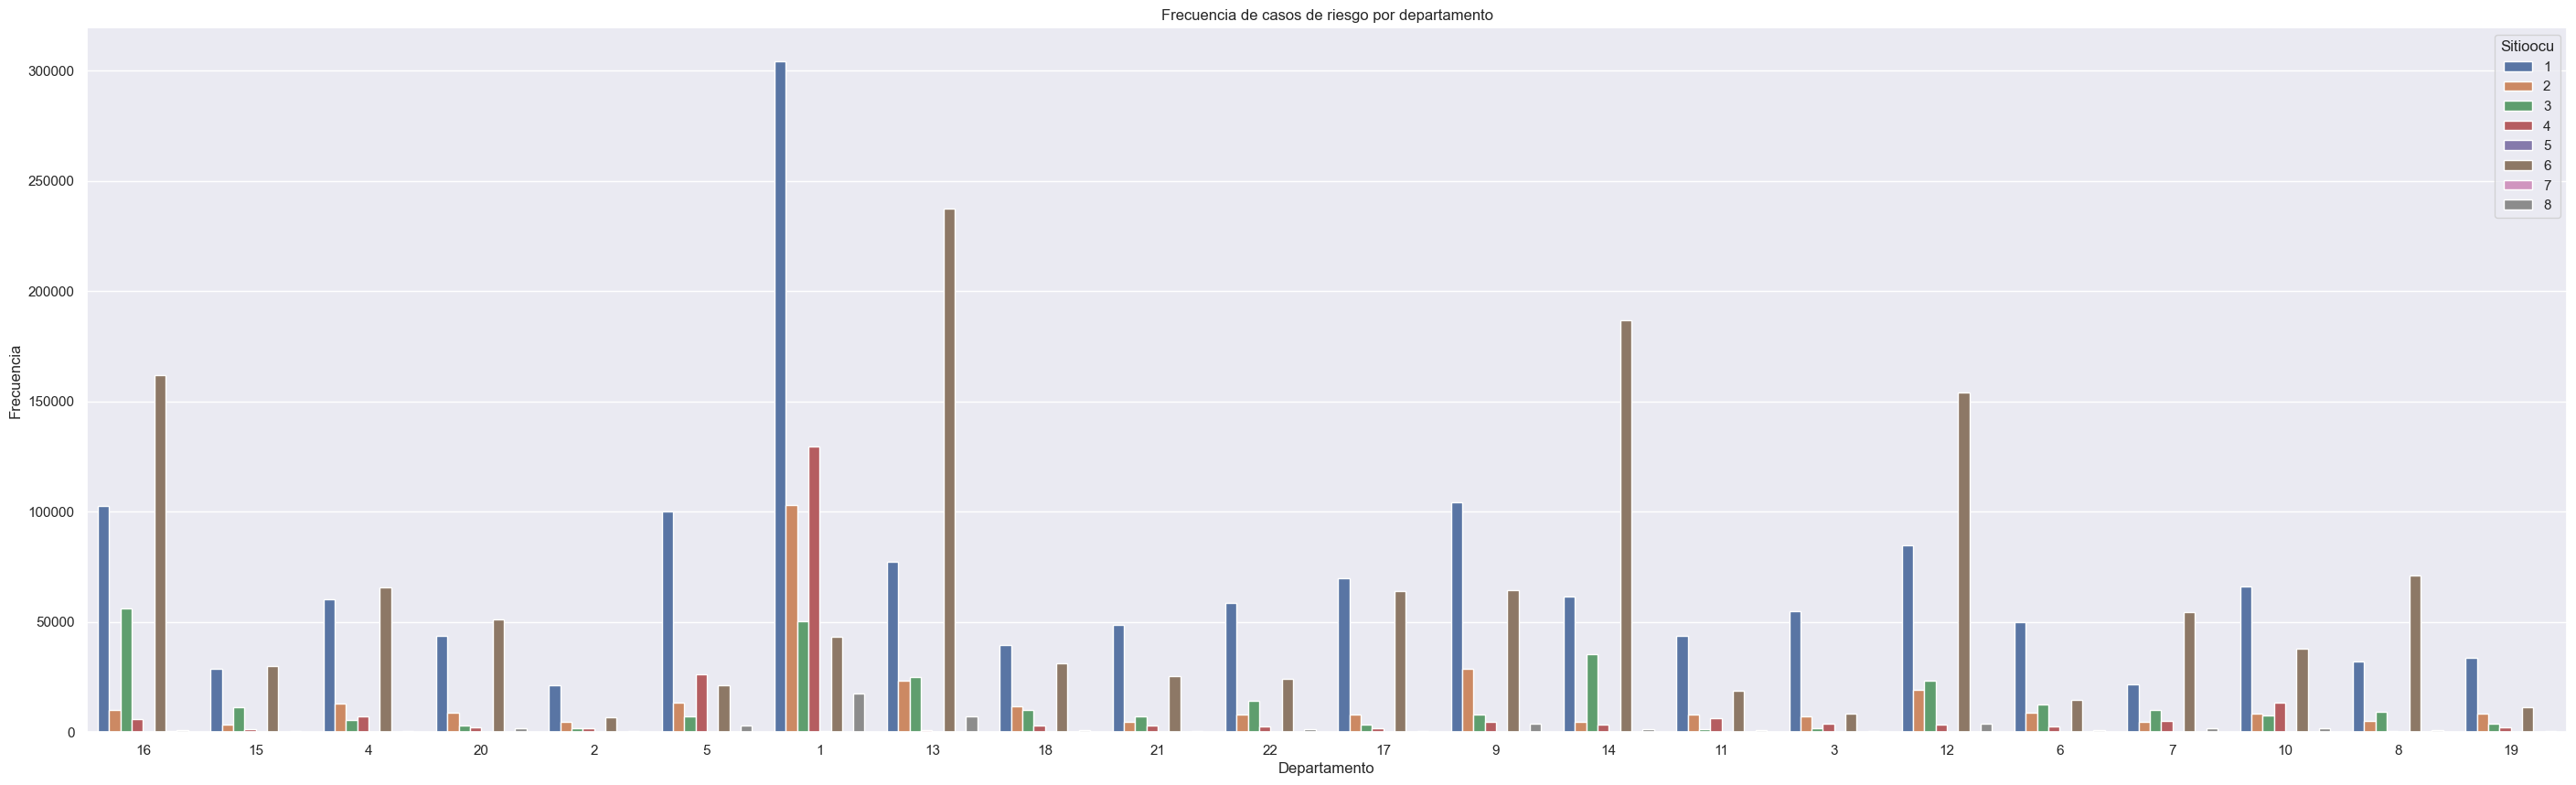

In [281]:
# Agrupar los datos por 'Year' y 'Asisrec' y contar la frecuencia de cada combinación
grouped_data = data_sitio.groupby(['Depreg', 'Sitioocu']).size().reset_index(name='Count')

# Ordenar los datos por 'Year'
grouped_data = grouped_data.sort_values(by='Depreg')

# Graficar los resultados utilizando un gráfico de línea o de barras
plt.figure(figsize=(35, 10))
# sns.lineplot(x='Depreg', y='Count', hue='Asisrec', data=grouped_data)
# O bien, utilizar un gráfico de barras agrupado
sns.barplot(x='Depreg', y='Count', hue='Sitioocu', data=grouped_data, ci=None)
plt.xlabel('Departamento')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de casos de riesgo por departamento')
plt.show()

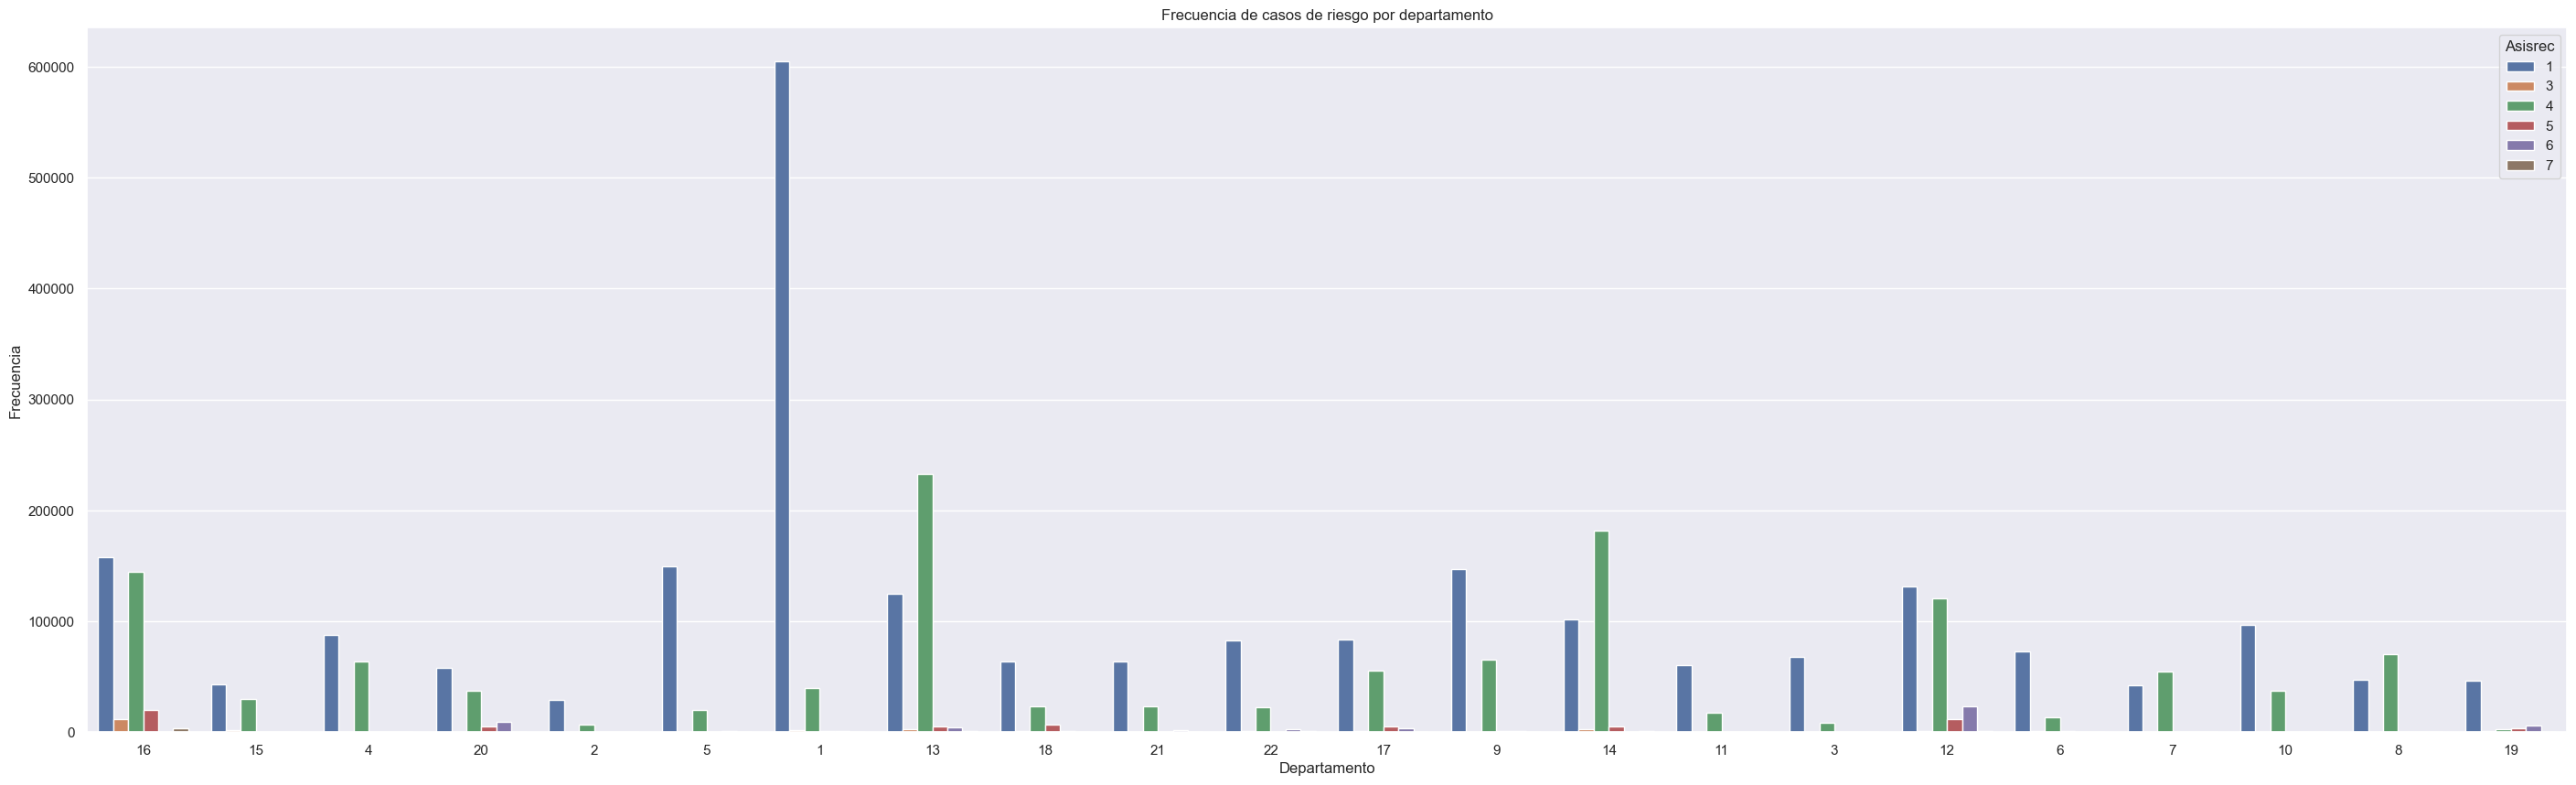

In [282]:
# Agrupar los datos por 'Year' y 'Asisrec' y contar la frecuencia de cada combinación
grouped_data = data_sitio.groupby(['Depreg', 'Asisrec']).size().reset_index(name='Count')

# Ordenar los datos por 'Year'
grouped_data = grouped_data.sort_values(by='Depreg')

# Graficar los resultados utilizando un gráfico de línea o de barras
plt.figure(figsize=(35, 10))
# sns.lineplot(x='Depreg', y='Count', hue='Asisrec', data=grouped_data)
# O bien, utilizar un gráfico de barras agrupado
sns.barplot(x='Depreg', y='Count', hue='Asisrec', data=grouped_data, ci=None)
plt.xlabel('Departamento')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de casos de riesgo por departamento')
plt.show()

## Clustering de datos

In [283]:
x = data.filter(["Sitioocu", "Asisrec"]) # TODO cambiar a variables a utilizar

kmeans = KMeans(3)
kmeans.fit(x)

clusters_identificados = kmeans.fit_predict(x)

# Revisar los resultados

clusters_identificados

datos_con_clusters = data

# Crear una nueva serie, que tenga el cluster identificado para cada observación

datos_con_clusters['Cluster'] = clusters_identificados

# Revisar el resultado

datos_con_clusters

datos_con_clusters["Cluster"] = datos_con_clusters["Cluster"].astype("category")



In [284]:
# fig = px.scatter(
#     datos_con_clusters, 
#     x = "Sitioocu", 
#     y = "Asisrec", 
#     color = "Cluster",
# #    size = '', 
#     hover_data = ['Depreg']
# )

# fig.show()

![Imagen Clustering](./klusters_plot.JPG)

## Porcentaje de aumento anual en partos por asistencia medica

In [285]:
from scipy import stats

medica_df = data_sitio[data_sitio['Asisrec'] == 1]
medica_df = medica_df.groupby(['Year', 'Asisrec']).size().reset_index(name='Count')

# Obtener los años y los valores de 'Asisrec' como arrays
years = medica_df['Year'].values
asisrec_values = medica_df['Count'].values

# Calcular la tasa de crecimiento utilizando regresión lineal
slope, _, _, _, _ = stats.linregress(years, asisrec_values)

total_years = 0
for year_count in medica_df['Count']:
    total_years += year_count

total_years = total_years / 10
medica_df
tasa_crecimiento = round(slope / total_years * 100, 2)
print(f"La tasa de crecimiento promedio en partos con asistencia médica es: {tasa_crecimiento}%")


La tasa de crecimiento promedio en partos con asistencia médica es: 4.77%


## 5 departamentos con mayor asistencia recibida por comadronas

In [286]:
# Filtrar las filas donde 'Asisrec' es de tipo 'Médica'
medica_df = data_sitio.copy()
medica_df = data_sitio[data_sitio['Asisrec'] == 4]
incidencias_totales = data_sitio['Depreg'].value_counts()
top5_incidencias = incidencias_totales.head(5)
dataset_top5 = medica_df[medica_df['Depreg'].isin(top5_incidencias.index)]
print(dataset_top5['Depreg'].unique())
dataset_top5

[1, 16, 14, 12, 13]
Categories (22, int64): [16, 15, 4, 20, ..., 7, 10, 8, 19]


,Depreg,Asisrec,Sitioocu,Year,Escolap,Escolam
17,1,4,6,2009,1,1
19,1,4,6,2009,1,1
20,1,4,6,2009,1,1
22,1,4,6,2009,1,1
30,1,4,6,2009,1,1
...,...,...,...,...,...,...
383236,13,4,5,2018,1,1
383241,16,4,5,2018,1,1
383253,12,4,5,2018,1,1
383254,12,4,5,2018,2,2


In [287]:
dataset_top5['Depreg'] = dataset_top5['Depreg'].replace({
    1: 'Guatemala',
    2: 'El Progreso',
    3: 'Sacatepéquez',
    4: 'Chimaltenango',
    5: 'Escuintla',
    6: 'Santa Rosa',
    7: 'Sololá',
    7: 'Solola',
    8: 'Totonicapán',
    9: 'Quetzaltenango',
    10: 'Suchitepéquez',
    11: 'Retalhuleu',
    12: 'San Marcos',
    13: 'Huehuetenango',
    14: 'Quiché',
    15: 'Baja Verapaz',
    16: 'Alta Verapaz',
    17: 'Petén',
    18: 'Izabal',
    19: 'Zacapa',
    20: 'Chiquimula',
    21: 'Jalapa',
    22: 'Jutiapa',
    1: 'Guatemala',
    2: 'El Progreso',
    3: 'Sacatepequez',
    4: 'Chimaltenango',
    5: 'Escuintla',
    6: 'Santa Rosa',
    7: 'Solola',
    8: 'Totonicapan',
    9: 'Quetzaltenango',
    10: 'Suchitepecquez',
    11: 'Retalhuleu',
    12: 'San Marcos',
    13: 'Huehuetenango',
    14: 'Quiche',
    15: 'Baja Verapaz',
    16: 'Alta Verapaz',
    17: 'Peten',
    18: 'Izabal',
    19: 'Zacapa',
    20: 'Chiquimula',
    21: 'Jalapa',
    22: 'Jutiapa',
    10: 'Suchitepequez'
})

In [288]:
grouped_data = dataset_top5.groupby(['Depreg', 'Asisrec']).size().reset_index(name='Count')
grouped_data = grouped_data.sort_values(by='Count')

grouped_data = grouped_data[grouped_data['Count'] > 0]
plotData = grouped_data
plotData = plotData.set_index(pd.Index([1, 2, 3, 4, 5]))
plotData


,Depreg,Asisrec,Count
1,Guatemala,4,39610
2,San Marcos,4,120765
3,Alta Verapaz,4,144566
4,Quiche,4,181771
5,Huehuetenango,4,232846


In [289]:
plotData.shape


(5, 3)

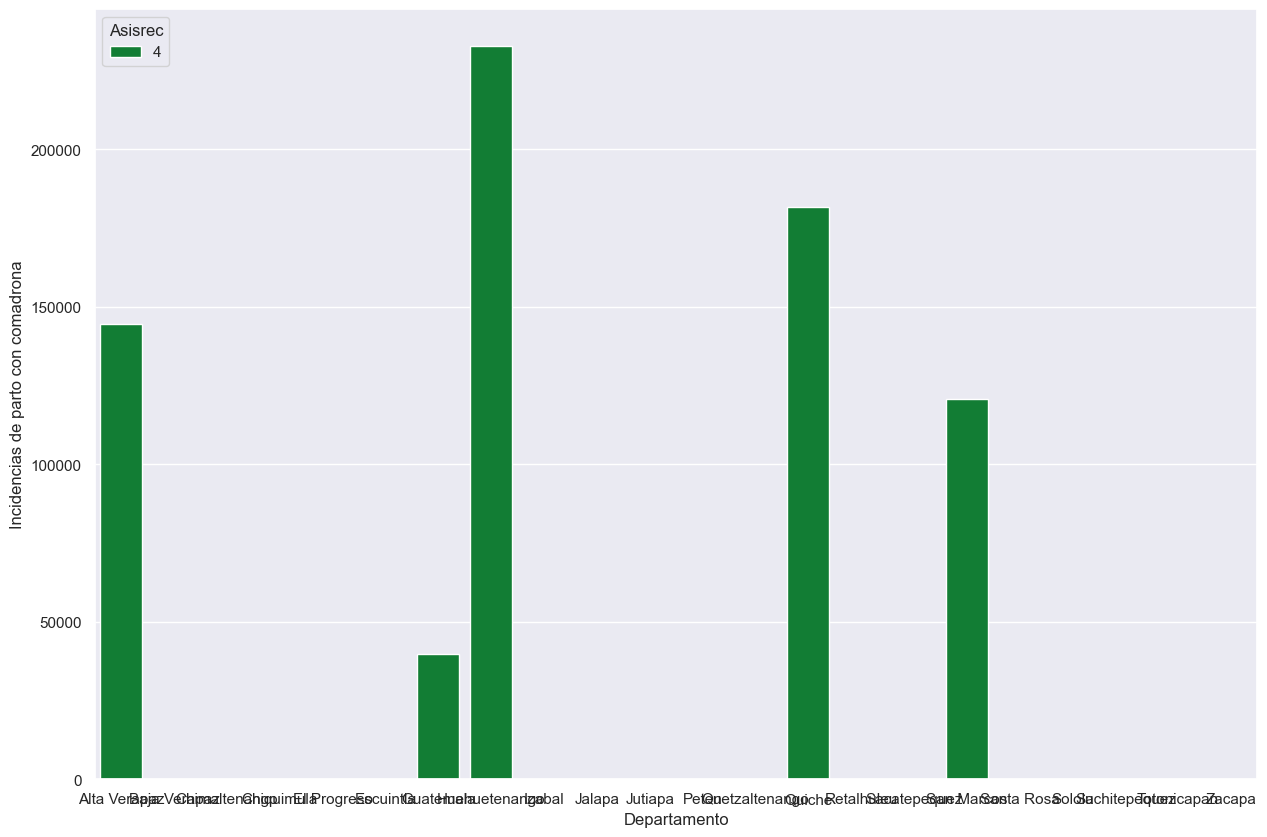

In [290]:
# Graficar los resultados utilizando un gráfico de línea o de barras
plt.figure(figsize=(15, 10))

colors = ["#008F2E", '#33006F']
sns.barplot(x='Depreg', y='Count', hue='Asisrec', data=plotData, ci=None, palette=colors)
plt.xlabel('Departamento')
plt.ylabel('Incidencias de parto con comadrona')
plt.show()

In [291]:
grouped_data

,Depreg,Asisrec,Count
6,Guatemala,4,39610
16,San Marcos,4,120765
0,Alta Verapaz,4,144566
13,Quiche,4,181771
7,Huehuetenango,4,232846


## Modelo - para asistencia recibida

In [292]:
data_model = data
X = data_model[['Depreg',	'Sitioocu',	'Escolap', 'Escolam']].values
y = data_model.iloc[:, 1].values
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [293]:
import warnings
warnings.filterwarnings('ignore')

# Modelo para asistencia recibida
model = LogisticRegression()
model.fit(X_entreno, y_entreno)

y_pred = model.predict(X_prueba)

np.concatenate((y_pred.reshape(len(y_pred),1), y_pred.reshape(len(y_pred),1)),1)
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_prueba, y_pred))

cm = confusion_matrix(y_prueba, y_pred)
print(cm)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicción')
# plt.ylabel('Valor Real')
# plt.title('Matriz de Confusión')
# plt.show()

              precision    recall  f1-score   support

           3       0.84      0.76      0.80      5921
           5       0.51      0.91      0.65     13350
           6       0.44      0.06      0.11     11454

    accuracy                           0.56     30725
   macro avg       0.60      0.57      0.52     30725
weighted avg       0.55      0.56      0.48     30725

[[ 4475  1227   219]
 [  585 12084   681]
 [  237 10521   696]]


In [294]:
x = data.filter(["Sitioocu", "Asisrec"]) # TODO cambiar a variables a utilizar

kmeans = KMeans(3)
kmeans.fit(x)

clusters_identificados = kmeans.fit_predict(x)

# Revisar los resultados

clusters_identificados

datos_con_clusters = data

# Crear una nueva serie, que tenga el cluster identificado para cada observación

datos_con_clusters['Cluster'] = clusters_identificados

# Revisar el resultado

datos_con_clusters

datos_con_clusters["Cluster"] = datos_con_clusters["Cluster"].astype("category")



In [295]:
casos_riesgo = []
prediccc = []

for depreg in range(1, 23):
    for escolam in range(1, 9):
        for escolap in range(1, 9):
            for sitio in range(1, 9):
                permutacion = [depreg, escolam, escolap, sitio]
                prediccion = model.predict([permutacion])[0]
                if prediccion not in prediccc:
                    prediccc.append(prediccion)
                if prediccion > 3:
                    permutacion.append(prediccion)
                    casos_riesgo.append(permutacion)

print(prediccc)
print(f"---- Casos de Riesgo: {len(casos_riesgo)} ----")
# print("Deprog\tescolam\ttescolap\tyear\tsitio")

Depreg = []
escolam = []
escolap = []
sitio = []
asisrec = []


for p in casos_riesgo:
    # print(f'{p[0]}\t{p[1]}\t{p[2]}\t{p[3]}\t{p[4]}\t')
    Depreg.append(p[0])
    escolam.append(p[1])
    escolap.append(p[2])
    sitio.append(p[3])
    asisrec.append(p[4])

analisis_riesgo = pd.DataFrame()
analisis_riesgo['Depreg'] = Depreg
analisis_riesgo['Escolam'] = escolam
analisis_riesgo['escolap'] = escolap
analisis_riesgo['Sitioocu'] = sitio
analisis_riesgo['Asisrec'] = asisrec
recuento_asistencia = analisis_riesgo['Asisrec'].value_counts()
print(recuento_asistencia)
analisis_riesgo

[3, 5, 6]
---- Casos de Riesgo: 4785 ----
6    3388
5    1397
Name: Asisrec, dtype: int64


,Depreg,Escolam,escolap,Sitioocu,Asisrec
0,1,6,1,1,5
1,1,6,1,2,5
2,1,6,1,3,5
3,1,6,1,4,5
4,1,6,1,5,6
...,...,...,...,...,...
4780,22,8,8,4,6
4781,22,8,8,5,6
4782,22,8,8,6,6
4783,22,8,8,7,6


In [296]:
analisis_riesgo['Depreg'] = analisis_riesgo['Depreg'].replace({
    1: 'Guatemala',
    2: 'El Progreso',
    3: 'Sacatepéquez',
    4: 'Chimaltenango',
    5: 'Escuintla',
    6: 'Santa Rosa',
    7: 'Sololá',
    7: 'Solola',
    8: 'Totonicapán',
    9: 'Quetzaltenango',
    10: 'Suchitepéquez',
    11: 'Retalhuleu',
    12: 'San Marcos',
    13: 'Huehuetenango',
    14: 'Quiché',
    15: 'Baja Verapaz',
    16: 'Alta Verapaz',
    17: 'Petén',
    18: 'Izabal',
    19: 'Zacapa',
    20: 'Chiquimula',
    21: 'Jalapa',
    22: 'Jutiapa',
    1: 'Guatemala',
    2: 'El Progreso',
    3: 'Sacatepequez',
    4: 'Chimaltenango',
    5: 'Escuintla',
    6: 'Santa Rosa',
    7: 'Solola',
    8: 'Totonicapan',
    9: 'Quetzaltenango',
    10: 'Suchitepecquez',
    11: 'Retalhuleu',
    12: 'San Marcos',
    13: 'Huehuetenango',
    14: 'Quiche',
    15: 'Baja Verapaz',
    16: 'Alta Verapaz',
    17: 'Peten',
    18: 'Izabal',
    19: 'Zacapa',
    20: 'Chiquimula',
    21: 'Jalapa',
    22: 'Jutiapa',
    10: 'Suchitepequez'
})

In [297]:
incidencias_totales = analisis_riesgo['Depreg'].value_counts()
top5_incidencias = incidencias_totales.head(5)
dataset_top5 = analisis_riesgo[analisis_riesgo['Depreg'].isin(top5_incidencias.index)]
dataset_top5

,Depreg,Escolam,escolap,Sitioocu,Asisrec
3460,Izabal,4,1,1,5
3461,Izabal,5,1,1,5
3462,Izabal,5,1,2,5
3463,Izabal,5,1,3,5
3464,Izabal,5,1,4,5
...,...,...,...,...,...
4780,Jutiapa,8,8,4,6
4781,Jutiapa,8,8,5,6
4782,Jutiapa,8,8,6,6
4783,Jutiapa,8,8,7,6


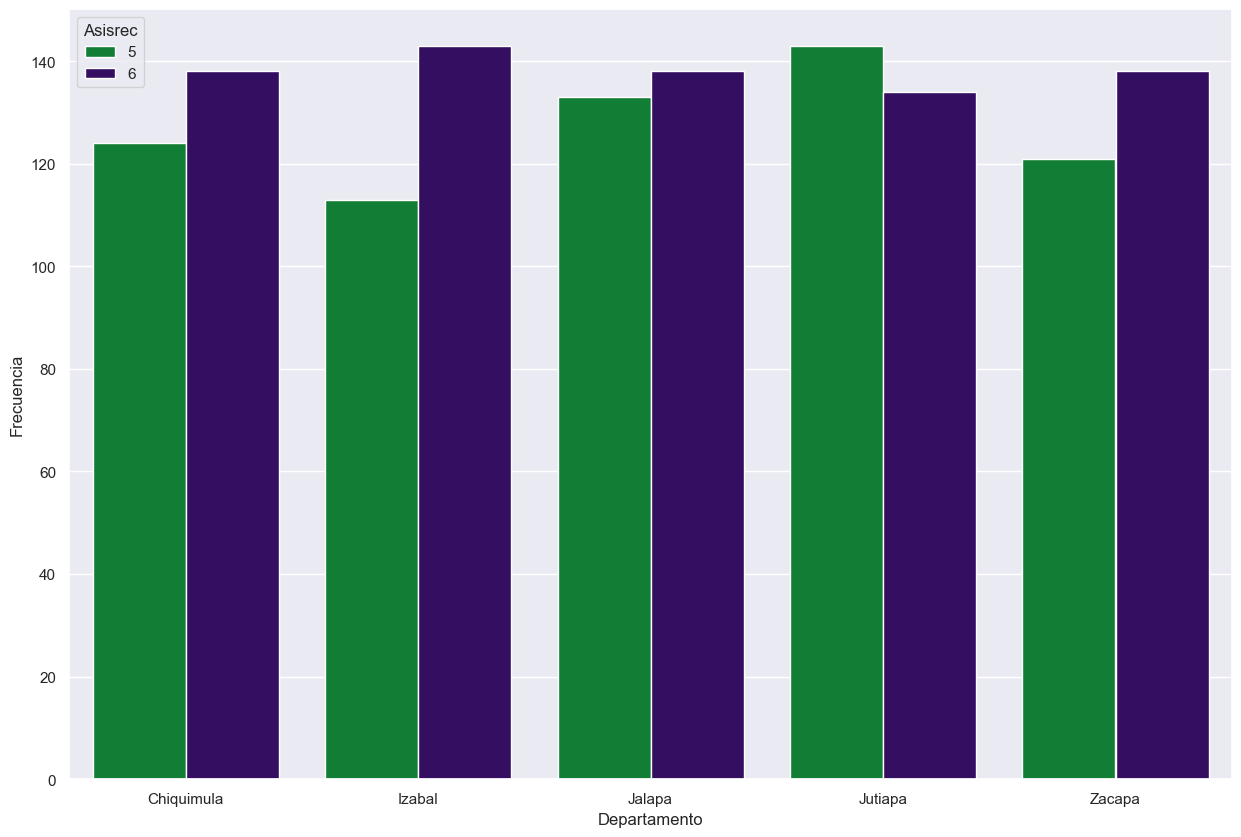

In [298]:
# Agrupar los datos por 'Year' y 'Asisrec' y contar la frecuencia de cada combinación
grouped_data = dataset_top5.groupby(['Depreg', 'Asisrec']).size().reset_index(name='Count')

# Ordenar los datos por 'Year'
grouped_data = grouped_data.sort_values(by='Depreg')

# Graficar los resultados utilizando un gráfico de línea o de barras
plt.figure(figsize=(15, 10))
# sns.lineplot(x='Depreg', y='Count', hue='Asisrec', data=grouped_data)
# O bien, utilizar un gráfico de barras agrupado
colors = ["#008F2E", '#33006F']
sns.barplot(x='Depreg', y='Count', hue='Asisrec', data=grouped_data, ci=None, palette=colors)
plt.xlabel('Departamento')
plt.ylabel('Frecuencia')
plt.show()

## Modelo - para sitio de nacimiento

In [299]:
data_sitio

,Depreg,Asisrec,Sitioocu,Year,Escolap,Escolam
0,1,1,6,2009,1,1
1,1,1,6,2009,1,1
2,1,1,6,2009,1,1
3,1,1,6,2009,1,1
4,1,1,6,2009,1,1
...,...,...,...,...,...,...
383258,14,1,5,2018,4,4
383259,5,5,5,2018,4,4
383260,16,5,5,2018,1,1
383261,17,5,5,2018,4,4


In [300]:

X = data_sitio[['Depreg',	'Asisrec', 'Escolap', 'Escolam']].values
y = data_sitio.iloc[:, 2].values
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [301]:
# Modelo para asistencia recibida
model = LogisticRegression()
model.fit(X_entreno, y_entreno)

y_pred = model.predict(X_prueba)

np.concatenate((y_pred.reshape(len(y_pred),1), y_pred.reshape(len(y_pred),1)),1)
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_prueba, y_pred))

cm = confusion_matrix(y_prueba, y_pred)
print(cm)
# sns.heatmap(cm

              precision    recall  f1-score   support

           1       0.63      0.96      0.76    301237
           2       0.12      0.03      0.05     62998
           3       0.00      0.00      0.00     61264
           4       0.00      0.00      0.00     45776
           5       0.00      0.00      0.00       334
           6       0.95      0.99      0.97    277037
           7       0.00      0.00      0.00       170
           8       0.00      0.00      0.00     10406

    accuracy                           0.74    759222
   macro avg       0.21      0.25      0.22    759222
weighted avg       0.61      0.74      0.66    759222

[[288922  12203      0      0      0    112      0      0]
 [ 60865   2004      0      0      0    129      0      0]
 [ 52103   1486      0      0      0   7675      0      0]
 [ 44560   1159      0      0      0     57      0      0]
 [    24      0      0      0      0    310      0      0]
 [  3392     96      0      0      0 273549      0    

In [302]:
casos_riesgo = []

for depreg in range(1, 23):
    for escolam in range(1, 9):
        for escolap in range(1, 9):
            for Asisrec in range(1, 9):
                permutacion = [depreg, Asisrec, escolap, escolam]
                prediccion = model.predict([permutacion])[0]

                if prediccion in [5, 6, 3, 4]:
                    permutacion.append(prediccion)
                    casos_riesgo.append(permutacion)

print(prediccc)
print(f"---- Casos de Riesgo: {len(casos_riesgo)} ----")
# print("Deprog\tescolam\ttescolap\tyear\tsitio")

Depreg = []
escolam = []
escolap = []
sitio = []
asisrec = []


for p in casos_riesgo:
    # print(f'{p[0]}\t{p[1]}\t{p[2]}\t{p[3]}\t{p[4]}\t')
    Depreg.append(p[0])
    asisrec.append(p[1])
    escolap.append(p[2])
    escolam.append(p[3])
    sitio.append(p[4])

analisis_riesgo = pd.DataFrame()
analisis_riesgo['Depreg'] = Depreg
analisis_riesgo['Escolam'] = escolam
analisis_riesgo['escolap'] = escolap
analisis_riesgo['Sitioocu'] = sitio
analisis_riesgo['Asisrec'] = asisrec
recuento_asistencia = analisis_riesgo['Asisrec'].value_counts()
print(recuento_asistencia)
analisis_riesgo

[3, 5, 6]
---- Casos de Riesgo: 9470 ----
3    1408
4    1408
5    1408
6    1408
7    1408
8    1408
2    1022
Name: Asisrec, dtype: int64


,Depreg,Escolam,escolap,Sitioocu,Asisrec
0,1,1,1,6,2
1,1,1,1,6,3
2,1,1,1,6,4
3,1,1,1,6,5
4,1,1,1,6,6
...,...,...,...,...,...
9465,22,8,8,6,4
9466,22,8,8,6,5
9467,22,8,8,6,6
9468,22,8,8,6,7


In [303]:
analisis_riesgo['Depreg'] = analisis_riesgo['Depreg'].replace({
    1: 'Guatemala',
    2: 'El Progreso',
    3: 'Sacatepéquez',
    4: 'Chimaltenango',
    5: 'Escuintla',
    6: 'Santa Rosa',
    7: 'Sololá',
    7: 'Solola',
    8: 'Totonicapán',
    9: 'Quetzaltenango',
    10: 'Suchitepéquez',
    11: 'Retalhuleu',
    12: 'San Marcos',
    13: 'Huehuetenango',
    14: 'Quiché',
    15: 'Baja Verapaz',
    16: 'Alta Verapaz',
    17: 'Petén',
    18: 'Izabal',
    19: 'Zacapa',
    20: 'Chiquimula',
    21: 'Jalapa',
    22: 'Jutiapa',
    1: 'Guatemala',
    2: 'El Progreso',
    3: 'Sacatepequez',
    4: 'Chimaltenango',
    5: 'Escuintla',
    6: 'Santa Rosa',
    7: 'Solola',
    8: 'Totonicapan',
    9: 'Quetzaltenango',
    10: 'Suchitepecquez',
    11: 'Retalhuleu',
    12: 'San Marcos',
    13: 'Huehuetenango',
    14: 'Quiche',
    15: 'Baja Verapaz',
    16: 'Alta Verapaz',
    17: 'Peten',
    18: 'Izabal',
    19: 'Zacapa',
    20: 'Chiquimula',
    21: 'Jalapa',
    22: 'Jutiapa',
    10: 'Suchitepequez'
})

In [304]:
incidencias_totales = analisis_riesgo['Depreg'].value_counts()
top5_incidencias = incidencias_totales.head(5)
dataset_top5 = analisis_riesgo[analisis_riesgo['Depreg'].isin(top5_incidencias.index)]
dataset_top5

,Depreg,Escolam,escolap,Sitioocu,Asisrec
0,Guatemala,1,1,6,2
1,Guatemala,1,1,6,3
2,Guatemala,1,1,6,4
3,Guatemala,1,1,6,5
4,Guatemala,1,1,6,6
...,...,...,...,...,...
9465,Jutiapa,8,8,6,4
9466,Jutiapa,8,8,6,5
9467,Jutiapa,8,8,6,6
9468,Jutiapa,8,8,6,7


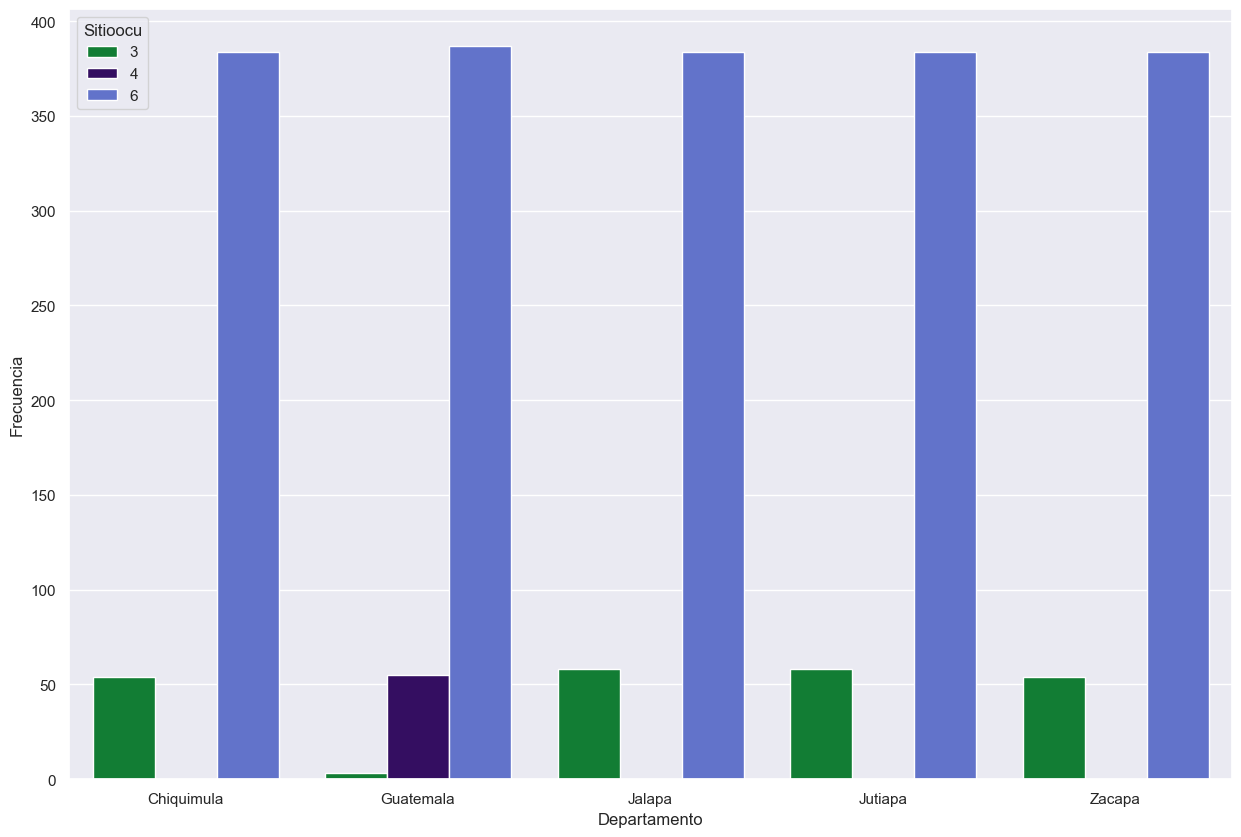

In [305]:
# Agrupar los datos por 'Year' y 'Asisrec' y contar la frecuencia de cada combinación
grouped_data = dataset_top5.groupby(['Depreg', 'Sitioocu']).size().reset_index(name='Count')

# Ordenar los datos por 'Year'
grouped_data = grouped_data.sort_values(by='Depreg')

# Graficar los resultados utilizando un gráfico de línea o de barras
plt.figure(figsize=(15, 10))
# sns.lineplot(x='Depreg', y='Count', hue='Asisrec', data=grouped_data)
# O bien, utilizar un gráfico de barras agrupado
colors = ["#008F2E", '#33006F', '#5167DB']
sns.barplot(x='Depreg', y='Count', hue='Sitioocu', data=grouped_data, ci=None, palette=colors)
plt.xlabel('Departamento')
plt.ylabel('Frecuencia')
plt.show()